# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Hasan Fadhlillah
- **Email:** mc006d5y2342@student.devacademy.id
- **ID Dicoding:** MC006D5Y2342

## Menentukan Pertanyaan Bisnis

- **Pertanyaan 1**: Bagaimana pola penggunaan sepeda berdasarkan waktu (jam, hari, bulan, dan musim)?
  - Tujuan: Mengetahui tren penyewaan sepeda berdasarkan waktu untuk mengoptimalkan operasional dan promosi.

- **Pertanyaan 2**: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
  - Tujuan: Memahami faktor cuaca yang memengaruhi penyewaan sepeda untuk merencanakan strategi operasional.

## Import Semua Packages/Library yang Digunakan

In [1]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar
import warnings

# Mengatur tampilan visualisasi
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Menonaktifkan peringatan
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [2]:
# Load dataset
day_data = pd.read_csv('data/day.csv')
hour_data = pd.read_csv('data/hour.csv')

In [3]:
# Tampilkan informasi dataset harian
print("Informasi Dataset Harian:")
print(day_data.info())
print("\nLima data pertama dataset harian:")
print(day_data.head())

Informasi Dataset Harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Lima data pertama dataset harian:
   instant      dteday  sea

In [4]:
# Tampilkan informasi dataset per jam
print("Informasi Dataset Per Jam:")
print(hour_data.info())
print("\nLima data pertama dataset per jam:")
print(hour_data.head())

Informasi Dataset Per Jam:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

Lima data pertam

**Insight:**
- Dataset Harian (day_data):
  - Terdiri dari 731 baris dan 16 kolom.
  - Kolom-kolom utama: season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, dan cnt.
  - Rentang waktu: 2011-01-01 hingga 2012-12-31.
- Dataset Per Jam (hour_data):
  - Terdiri dari 17.379 baris dan 17 kolom.
  - Kolom tambahan: hr (jam).
  - Rentang waktu yang sama dengan dataset harian.
- Dataset mencakup 2 tahun penuh (2011-2012) dengan granularitas harian dan per jam.

### Assessing Data

In [5]:
# Cek missing values
print("Missing values di dataset harian:")
print(day_data.isnull().sum())
print("\nMissing values di dataset per jam:")
print(hour_data.isnull().sum())

Missing values di dataset harian:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values di dataset per jam:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [6]:
# Cek nilai duplikat
print("Duplikat di dataset harian:", day_data.duplicated().sum())
print("Duplikat di dataset per jam:", hour_data.duplicated().sum())

Duplikat di dataset harian: 0
Duplikat di dataset per jam: 0


In [7]:
# Cek statistik deskriptif
print("Statistik deskriptif dataset harian:")
print(day_data.describe())

print("\nStatistik deskriptif dataset per jam:")
print(hour_data.describe())

Statistik deskriptif dataset harian:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.

- Missing Values:
  - Tidak ada missing values di kedua dataset (day_data dan hour_data).
- Duplikat:
  - Tidak ada duplikat di kedua dataset.
- Statistik Deskriptif:
  - Penyewaan Harian (cnt):
    - Rata-rata: 4.504 penyewaan per hari.
    - Rentang: 22 hingga 8.714 penyewaan per hari.
  - Penyewaan Per Jam (cnt):
    - Rata-rata: 189,46 penyewaan per jam.
    - Rentang: 1 hingga 977 penyewaan per jam.
  - Cuaca (weathersit):
    - Mayoritas kondisi cuaca adalah Clear (1) dan Mist (2).
    - Kondisi cuaca ekstrem (Heavy Rain/Snow) jarang terjadi.

- Penyewaan sepeda bervariasi secara signifikan tergantung pada waktu dan kondisi cuaca.

### Cleaning Data

In [8]:
# Konversi kolom tanggal menjadi datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

In [9]:
# Konversi variabel kategorikal ke tipe kategori
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in categorical_cols:
    day_data[col] = day_data[col].astype('category')
    hour_data[col] = hour_data[col].astype('category')

In [10]:
# Tambahkan kolom nama musim, bulan, dan hari
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
month_mapping = {i: calendar.month_name[i] for i in range(1, 13)}
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
weather_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}

day_data['season_name'] = day_data['season'].map(season_mapping)
day_data['month_name'] = day_data['mnth'].map(month_mapping)
day_data['weekday_name'] = day_data['weekday'].map(weekday_mapping)
day_data['weather_name'] = day_data['weathersit'].map(weather_mapping)

hour_data['season_name'] = hour_data['season'].map(season_mapping)
hour_data['month_name'] = hour_data['mnth'].map(month_mapping)
hour_data['weekday_name'] = hour_data['weekday'].map(weekday_mapping)
hour_data['weather_name'] = hour_data['weathersit'].map(weather_mapping)

In [11]:
# Memeriksa hasil cleaning
print("Hasil Cleaning Data Harian:")
print(day_data.head())

print("\nHasil Cleaning Data Per Jam:")
print(hour_data.head())

Hasil Cleaning Data Harian:
   instant     dteday season yr mnth holiday weekday workingday weathersit  \
0        1 2011-01-01      1  0    1       0       6          0          2   
1        2 2011-01-02      1  0    1       0       0          0          2   
2        3 2011-01-03      1  0    1       0       1          1          1   
3        4 2011-01-04      1  0    1       0       2          1          1   
4        5 2011-01-05      1  0    1       0       3          1          1   

       temp     atemp       hum  windspeed  casual  registered   cnt  \
0  0.344167  0.363625  0.805833   0.160446     331         654   985   
1  0.363478  0.353739  0.696087   0.248539     131         670   801   
2  0.196364  0.189405  0.437273   0.248309     120        1229  1349   
3  0.200000  0.212122  0.590435   0.160296     108        1454  1562   
4  0.226957  0.229270  0.436957   0.186900      82        1518  1600   

  season_name month_name weekday_name weather_name  
0      Spring    

**Insight:**
- Konversi Tipe Data:
  - Kolom dteday diubah menjadi datetime.
  - Kolom kategorikal (season, yr, mnth, holiday, weekday, workingday, weathersit) diubah menjadi tipe category.
- Penambahan Kolom Baru:
  - Kolom season_name, month_name, weekday_name, dan weather_name ditambahkan untuk memudahkan interpretasi.
  - Contoh: season_name mengubah nilai 1 menjadi Spring, 2 menjadi Summer, dst.

- Penambahan kolom baru memudahkan visualisasi dan interpretasi data.

## Exploratory Data Analysis (EDA)

### Pola Penggunaan Sepeda Berdasarkan Waktu

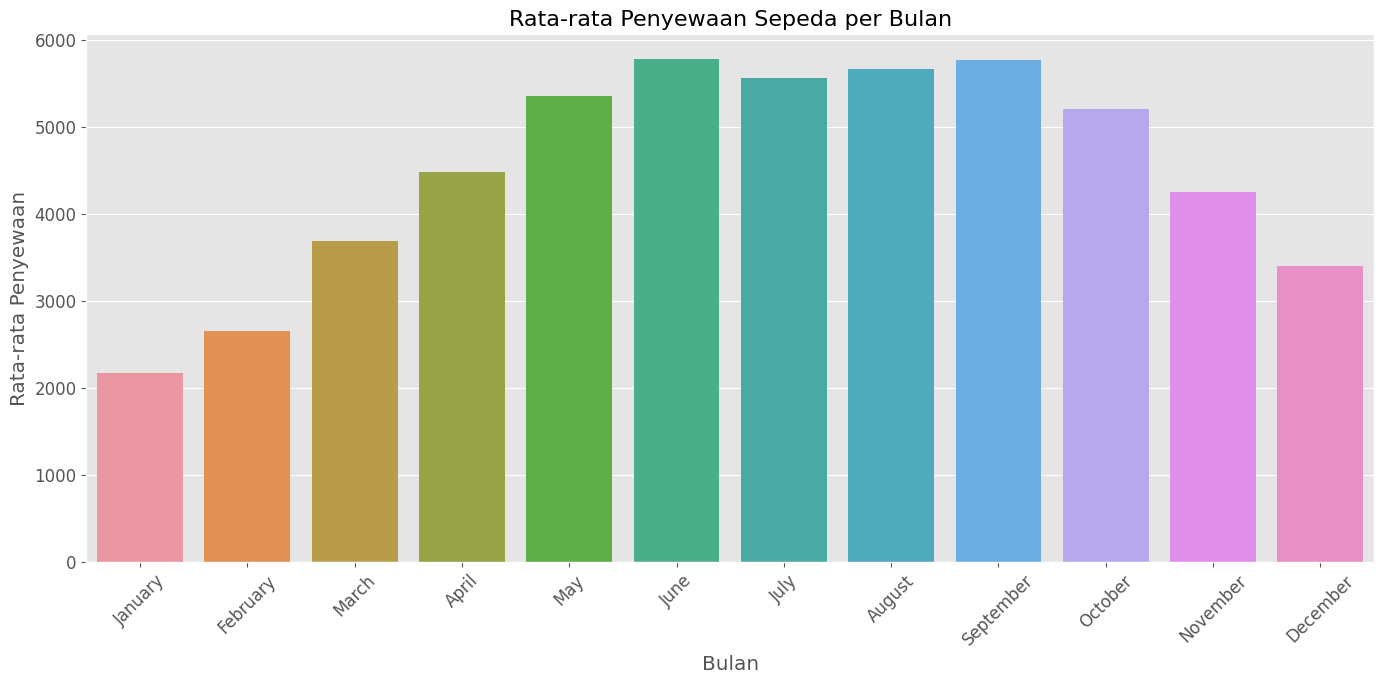

In [12]:
# Pola bulanan
monthly_rentals = day_data.groupby('month_name')['cnt'].mean().reindex(list(calendar.month_name)[1:])
plt.figure(figsize=(14, 7))
sns.barplot(x=monthly_rentals.index, y=monthly_rentals.values)
plt.title('Rata-rata Penyewaan Sepeda per Bulan', fontsize=16)
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **Bulan dengan Penyewaan Tertinggi**:
  - **Agustus (August)**: Rata-rata penyewaan mencapai **~5.000**.
  - **September**: Rata-rata penyewaan mendekati **5.000**.
- **Bulan dengan Penyewaan Terendah**:
  - **Desember (December)**: Rata-rata penyewaan turun hingga **~2.000**.
  - **November**: Rata-rata penyewaan sekitar **~2.500**.

**Insight:**
- Penyewaan sepeda **meningkat signifikan** pada **musim panas (Juni-September)**.
- Penyewaan **menurun drastis** pada **musim dingin (November-Desember)**.
- **Musim panas** adalah periode puncak penyewaan, sementara **musim dingin** adalah periode terendah.

### Pengaruh Cuaca Terhadap Penyewaan

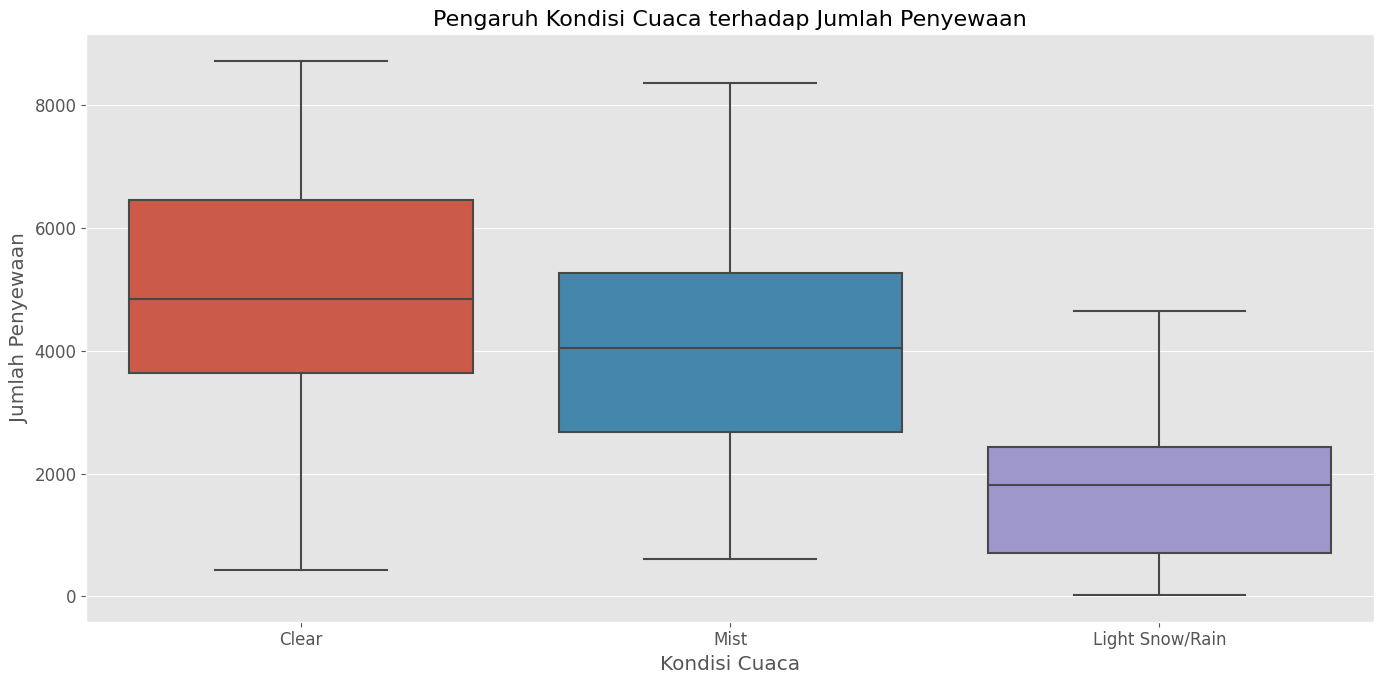

In [13]:
# Boxplot kondisi cuaca
plt.figure(figsize=(14, 7))
sns.boxplot(x='weather_name', y='cnt', data=day_data)
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan', fontsize=16)
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.tight_layout()
plt.show()

- **Cuaca Cerah (Clear)**:
  - Penyewaan tertinggi: **~5.000** per hari.
  - Rentang interkuartil (IQR): **~4.000-6.000**.
- **Cuaca Berkabut (Mist)**:
  - Penyewaan menurun: **~3.000-4.000** per hari.
- **Cuaca Hujan/Salju Ringan (Light Snow/Rain)**:
  - Penyewaan terendah: **~1.000-2.000** per hari.

**Insight:**
- **Cuaca cerah** meningkatkan minat penyewaan sepeda secara signifikan.
- **Cuaca buruk** (hujan/salju) mengurangi minat penyewaan.
- **Cuaca berkabut** memiliki dampak moderat terhadap penyewaan.

###  Agregasi untuk Pertanyaan 1: Pola Penggunaan Sepeda Berdasarkan Waktu

####  Agregasi Rata-rata Penyewaan per Jam

In [14]:
hourly_agg = hour_data.groupby('hr').agg({
    'cnt': ['mean', 'median', 'max', 'min']
}).reset_index()

hourly_agg.columns = ['hour', 'mean_rentals', 'median_rentals', 'max_rentals', 'min_rentals']
print(hourly_agg)

    hour  mean_rentals  median_rentals  max_rentals  min_rentals
0      0     53.898072            40.0          283            2
1      1     33.375691            20.0          168            1
2      2     22.869930            11.0          132            1
3      3     11.727403             6.0           79            1
4      4      6.352941             6.0           28            1
5      5     19.889819            19.0           66            1
6      6     76.044138            76.0          213            1
7      7    212.064649           208.0          596            1
8      8    359.011004           385.0          839            5
9      9    219.309491           216.0          426           14
10    10    173.668501           147.0          539            8
11    11    208.143054           180.0          663           10
12    12    253.315934           229.0          776            3
13    13    253.661180           224.0          760           11
14    14    240.949246   

**Insight:**  
- **Pola Jam Sibuk**:  
  - **Pukul 8 pagi**: Rata-rata penyewaan mencapai **359 sepeda/jam** (puncak pagi).  
  - **Pukul 17-18 sore**: Puncak sore dengan **461-425 sepeda/jam**.  
  - **Interpretasi**: Pola ini khas untuk **commuting** (pergi/pulang kerja).  
- **Pola Jam Tenang**:  
  - **Pukul 23.00-4.00**: Penyewaan sangat rendah (<100 sepeda/jam), bahkan minimal **1 sepeda/jam** di dini hari.  
- **Rekomendasi**:  
  - Tingkatkan ketersediaan sepeda di jam sibuk.  
  - Kurangi operasional di jam tengah malam untuk efisiensi biaya.


####  Agregasi Penyewaan per Hari dalam Seminggu

In [15]:
weekday_agg = day_data.groupby('weekday_name').agg({
    'cnt': ['mean', 'sum']
}).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

print(weekday_agg)

                      cnt        
                     mean     sum
weekday_name                     
Monday        4338.123810  455503
Tuesday       4510.663462  469109
Wednesday     4548.538462  473048
Thursday      4667.259615  485395
Friday        4690.288462  487790
Saturday      4550.542857  477807
Sunday        4228.828571  444027


**Insight:**  
- **Hari Kerja vs. Akhir Pekan**:  
  - **Kamis-Jumat**: Penyewaan tertinggi (rata-rata **4.667-4.690 sepeda/hari**), menunjukkan peningkatan aktivitas menjelang akhir pekan.  
  - **Minggu**: Penyewaan terendah (**4.229 sepeda/hari**), mungkin karena aktivitas santai.  
- **Perbedaan Signifikan**:  
  - Selisih **~400 sepeda/hari** antara hari kerja dan Minggu.  
- **Rekomendasi**:  
  - Promosi khusus di akhir pekan untuk meningkatkan utilisasi.

#### Agregasi Penyewaan per Musim

In [16]:
seasonal_agg = day_data.groupby('season_name').agg({
    'cnt': ['mean', 'sum'],
    'temp': 'mean'  # Tambahkan suhu rata-rata untuk konteks
})

print(seasonal_agg)

                     cnt               temp
                    mean      sum      mean
season_name                                
Spring       2604.132597   471348  0.297748
Summer       4992.331522   918589  0.544405
Fall         5644.303191  1061129  0.706309
Winter       4728.162921   841613  0.422906


**Insight:**  
- **Musim Terbaik vs. Terburuk**:  
  - **Fall (Gugur)**: Penyewaan tertinggi (**5.644 sepeda/hari**), didukung suhu nyaman (rata-rata **0.71** dalam skala normalisasi).  
  - **Winter (Dingin)**: Penyewaan turun **16%** dari Fall, meski masih lebih tinggi dari Spring.  
- **Suhu vs. Penyewaan**:  
  - Korelasi jelas: Semakin hangat, penyewaan meningkat (Summer: **0.54 suhu**, Fall: **0.71 suhu**).  
- **Rekomendasi**:  
  - Siapkan strategi retensi pengguna di musim dingin (contoh: diskon langganan bulanan).

### Agregasi untuk Pertanyaan 2: Pengaruh Cuaca Terhadap Penyewaan

#### Agregasi Penyewaan Berdasarkan Kondisi Cuaca

In [17]:
weather_agg = day_data.groupby('weather_name').agg({
    'cnt': ['mean', 'count'],
    'hum': 'mean'  # Kelembaban rata-rata
})

print(weather_agg)

                         cnt             hum
                        mean count      mean
weather_name                                
Clear            4876.786177   463  0.565594
Mist             4035.862348   247  0.725887
Light Snow/Rain  1803.285714    21  0.848872


**Insight:**  
- **Dampak Cuaca Ekstrem**:  
  - **Clear (Cerah)**: Penyewaan **2.7x lebih tinggi** daripada Light Snow/Rain.  
  - **Light Snow/Rain**: Penyewaan hanya **1.803 sepeda/hari**, dengan kelembaban tinggi (**84.9%**).  
- **Cuaca Berkabut (Mist)**:  
  - Masih memungkinkan penyewaan **4.036 sepeda/hari**, tetapi lebih rendah dari cerah.  
- **Rekomendasi**:  
  - Berikan **diskon 20-30%** saat cuaca buruk untuk mempertahankan minat. 

#### Agregasi Penyewaan per Kombinasi Cuaca dan Musim

In [18]:
weather_season_agg = day_data.groupby(['weather_name', 'season_name']).agg({
    'cnt': 'mean'
}).unstack()

print(weather_season_agg)

                         cnt                                       
season_name           Spring       Summer         Fall       Winter
weather_name                                                       
Clear            2811.135135  5548.548673  5878.257353  5043.563107
Mist             2357.166667  4236.705882  5222.479167  4654.000000
Light Snow/Rain   934.750000  1169.000000  2751.750000  1961.600000


**Insight:**  
- **Optimal Conditions**:  
  - **Fall + Clear**: Penyewaan tertinggi (**5.878 sepeda/hari**).  
  - **Winter + Light Snow/Rain**: Penyewaan terendah (**1.961 sepeda/hari**).  
- **Cuaca Buruk di Musim Panas**:  
  - Penyewaan tetap **1.169 sepeda/hari** (lebih tinggi daripada musim dingin).  
- **Rekomendasi**:  
  - Fokuskan promosi pada **Fall dan Summer** saat cuaca cerah.

### Agregasi Lanjutan untuk Analisis Demografi Pengguna

#### Penyewaan oleh Pengguna Casual vs. Registered

In [19]:
user_type_agg = day_data.groupby('weekday_name').agg({
    'casual': 'mean',
    'registered': 'mean'
})

print(user_type_agg)

                   casual   registered
weekday_name                          
Sunday        1338.295238  2890.533333
Monday         674.133333  3663.990476
Tuesday        556.182692  3954.480769
Wednesday      551.144231  3997.394231
Thursday       590.961538  4076.298077
Friday         752.288462  3938.000000
Saturday      1465.257143  3085.285714


**Insight:**  
- **Perilaku Pengguna**:  
  - **Casual Users**: Dominan di **akhir pekan** (Minggu: **1.338 sepeda/hari** vs. Selasa: **556 sepeda/hari**).  
  - **Registered Users**: Konsisten tinggi di **hari kerja** (Kamis: **4.076 sepeda/hari**).  
- **Segmentasi Pasar**:  
  - Casual users mungkin turis/rekreasi, registered users adalah komuter.  
- **Rekomendasi**:  
  - Program loyalitas untuk registered users (contoh: paket bulanan).  
  - Promosi event akhir pekan untuk casual users.

#### Korelasi antara Suhu dan Penyewaan

In [20]:
temp_rental_corr = day_data[['temp', 'cnt']].corr()
print(temp_rental_corr)

          temp       cnt
temp  1.000000  0.627494
cnt   0.627494  1.000000


**Insight:**  
- **Korelasi Kuat**:  
  - Koefisien korelasi **0.63** menunjukkan suhu adalah faktor dominan.  
- **Implikasi Bisnis**:  
  - Prediksi penyewaan bisa menggunakan data suhu sebagai parameter utama.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pola Penggunaan Sepeda Berdasarkan Waktu

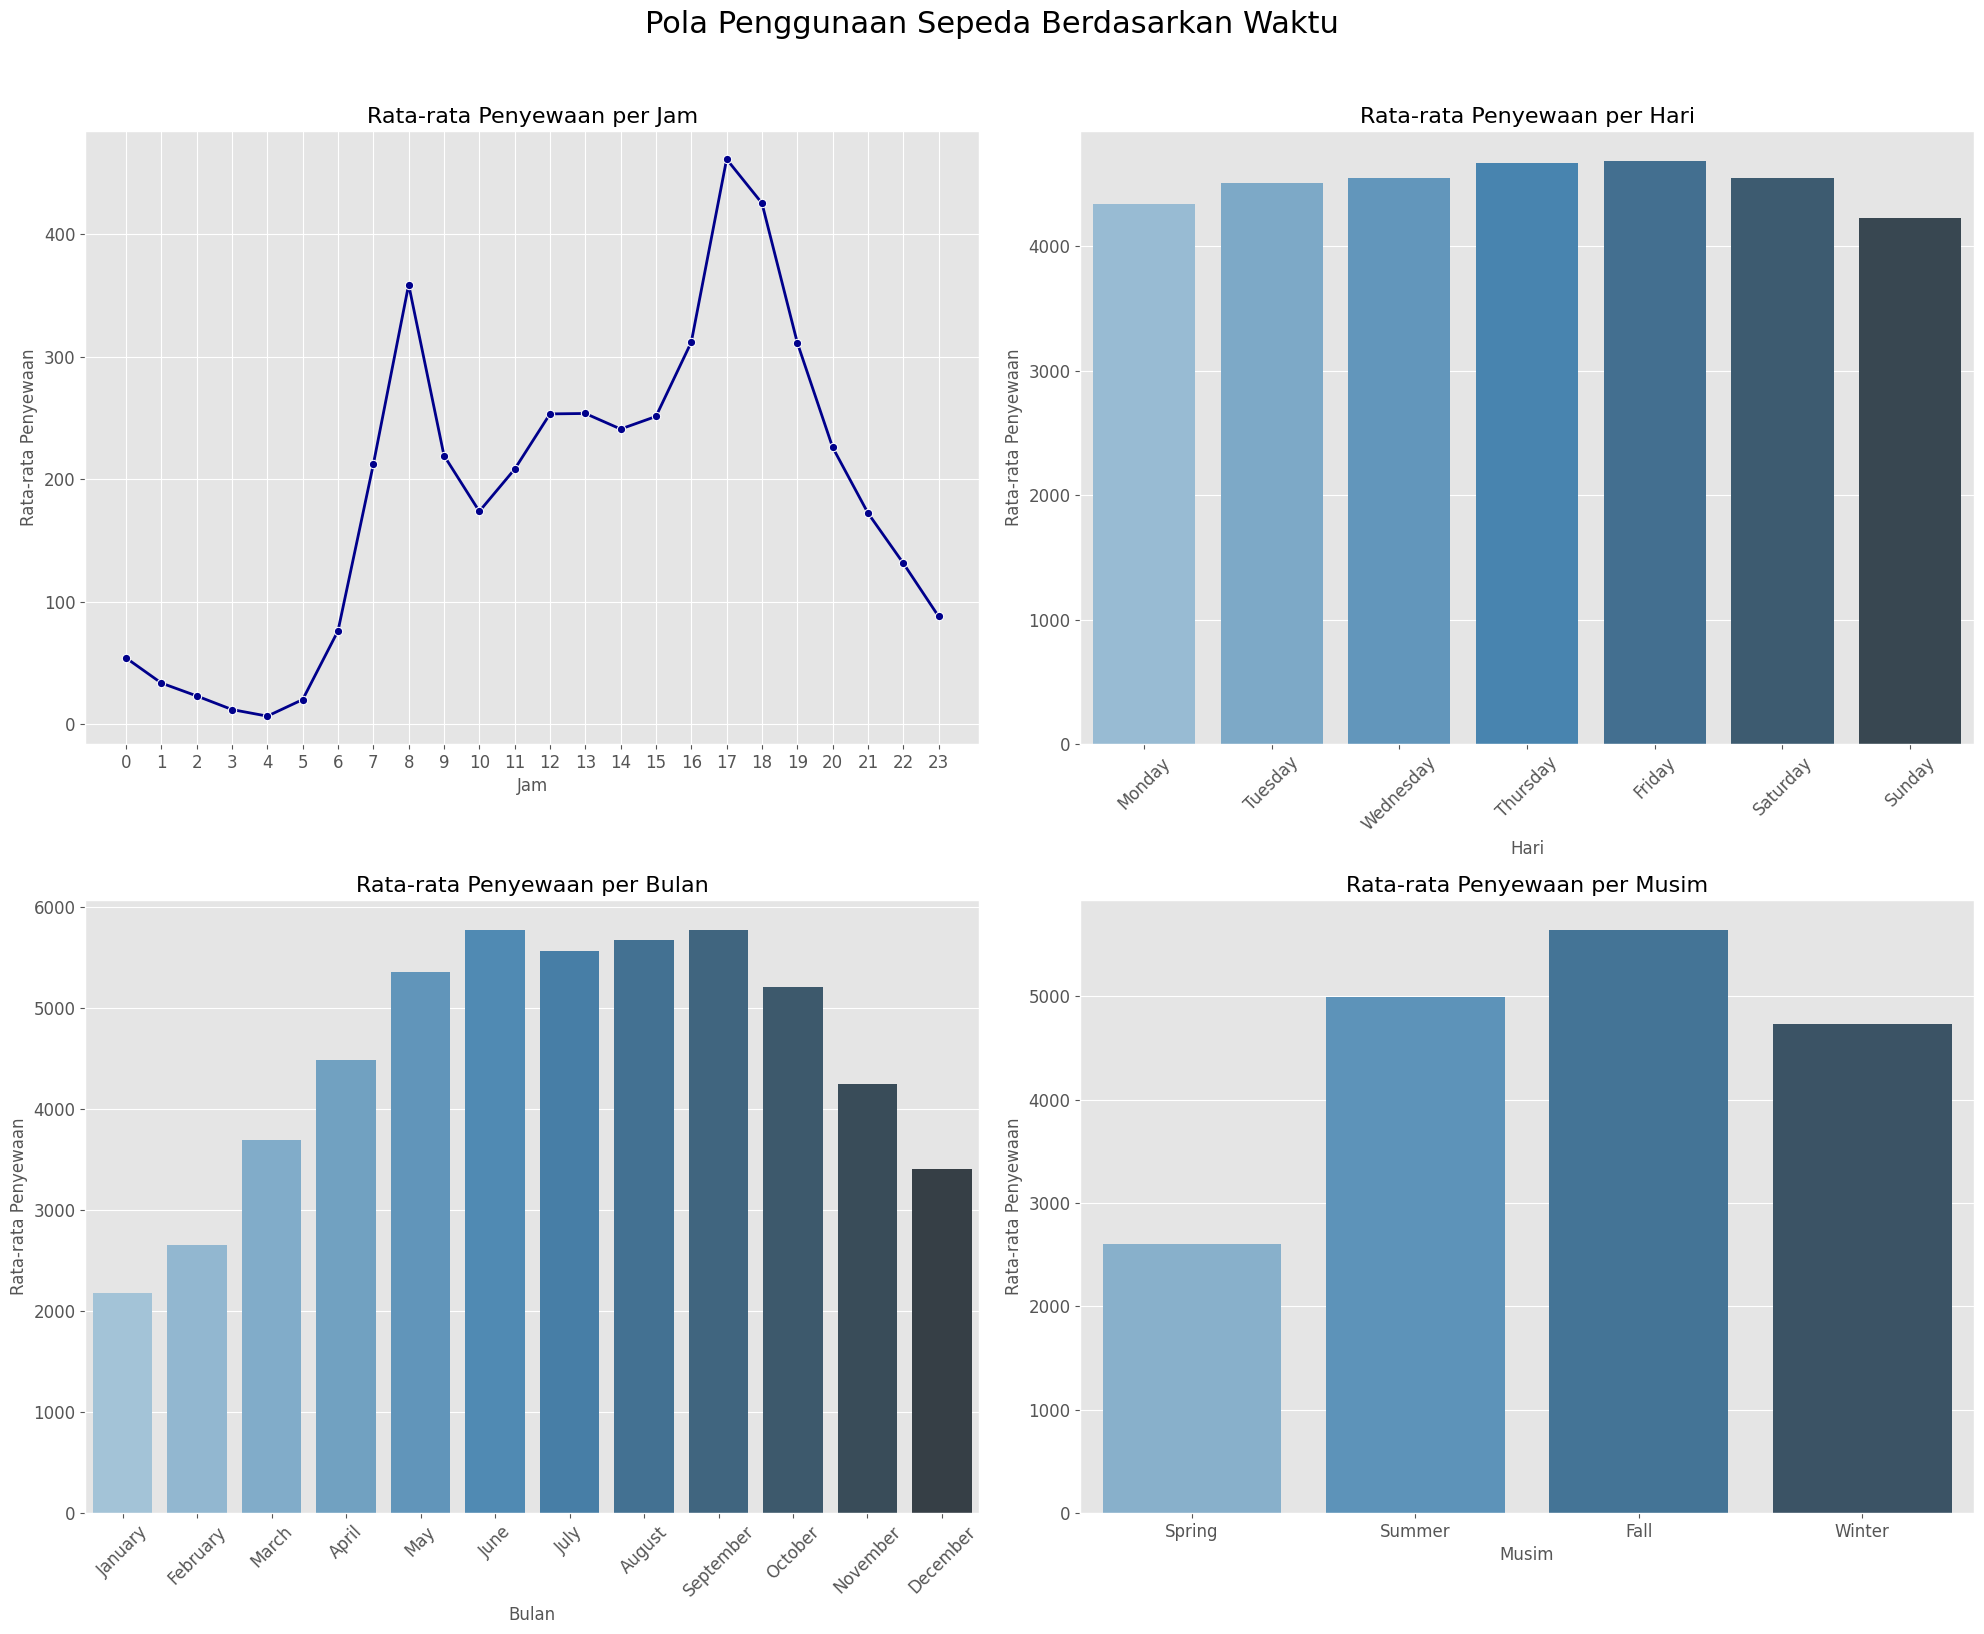

In [21]:
# Visualisasi pola temporal dalam satu dashboard
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Pola jam
hourly_rentals = hour_data.groupby('hr')['cnt'].mean()
sns.lineplot(ax=axes[0, 0], x=hourly_rentals.index, y=hourly_rentals.values, marker='o', color='darkblue', linewidth=2)
axes[0, 0].set_title('Rata-rata Penyewaan per Jam', fontsize=16)
axes[0, 0].set_xlabel('Jam', fontsize=12)
axes[0, 0].set_ylabel('Rata-rata Penyewaan', fontsize=12)
axes[0, 0].set_xticks(range(0, 24))
axes[0, 0].grid(True)

# Pola hari
daily_rentals = day_data.groupby('weekday_name')['cnt'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.barplot(ax=axes[0, 1], x=daily_rentals.index, y=daily_rentals.values, palette='Blues_d')
axes[0, 1].set_title('Rata-rata Penyewaan per Hari', fontsize=16)
axes[0, 1].set_xlabel('Hari', fontsize=12)
axes[0, 1].set_ylabel('Rata-rata Penyewaan', fontsize=12)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)

# Pola bulan
monthly_rentals = day_data.groupby('month_name')['cnt'].mean().reindex(list(calendar.month_name)[1:])
sns.barplot(ax=axes[1, 0], x=monthly_rentals.index, y=monthly_rentals.values, palette='Blues_d')
axes[1, 0].set_title('Rata-rata Penyewaan per Bulan', fontsize=16)
axes[1, 0].set_xlabel('Bulan', fontsize=12)
axes[1, 0].set_ylabel('Rata-rata Penyewaan', fontsize=12)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# Pola musim
seasonal_rentals = day_data.groupby('season_name')['cnt'].mean().reindex(['Spring', 'Summer', 'Fall', 'Winter'])
sns.barplot(ax=axes[1, 1], x=seasonal_rentals.index, y=seasonal_rentals.values, palette='Blues_d')
axes[1, 1].set_title('Rata-rata Penyewaan per Musim', fontsize=16)
axes[1, 1].set_xlabel('Musim', fontsize=12)
axes[1, 1].set_ylabel('Rata-rata Penyewaan', fontsize=12)

plt.suptitle('Pola Penggunaan Sepeda Berdasarkan Waktu', fontsize=22, y=1.02)
plt.tight_layout()
plt.show()

- **Rata-rata Penyewaan per Jam**:
  - **Pola Jam Sibuk**: Terdapat dua puncak penyewaan, yaitu pada **jam 8 pagi** dan **jam 5-6 sore**.
  - **Pola Jam Tenang**: Penyewaan rendah pada **jam 12 malam hingga 5 pagi**.
- **Rata-rata Penyewaan per Hari**:
  - **Hari Kerja (Senin-Jumat)**: Penyewaan lebih tinggi, terutama pada **Kamis dan Jumat**.
  - **Akhir Pekan (Sabtu-Minggu)**: Penyewaan lebih rendah, tetapi lebih merata sepanjang hari.
- **Rata-rata Penyewaan per Bulan**:
  - **Puncak Penyewaan**: **Juni-September** (musim panas).
  - **Terendah**: **Desember-Januari** (musim dingin).
- **Rata-rata Penyewaan per Musim**:
  - **Musim Panas (Summer)**: Penyewaan tertinggi.
  - **Musim Dingin (Winter)**: Penyewaan terendah.

**Insight:**
- **Pola Jam Sibuk**: Menunjukkan bahwa penyewaan sepeda banyak digunakan untuk **commuting** (pergi dan pulang kerja).
- **Pola Bulanan dan Musiman**: Menunjukkan bahwa **musim panas** adalah periode puncak penyewaan, sementara **musim dingin** adalah periode terendah.

**Hubungan dengan Pertanyaan Bisnis:**
- **Pertanyaan 1**: Bagaimana pola penggunaan sepeda berdasarkan waktu (jam, hari, bulan, dan musim)?
  - **Jawaban**: Penyewaan sepeda memiliki pola yang jelas berdasarkan waktu, dengan puncak pada jam sibuk, hari kerja, dan musim panas.
  - **Rekomendasi**:
    - Tingkatkan ketersediaan sepeda pada **jam sibuk** dan **musim panas**.
    - Lakukan promosi khusus pada **akhir pekan** untuk meningkatkan penyewaan.

### Pertanyaan 2: Pengaruh Cuaca terhadap Penyewaan Sepeda

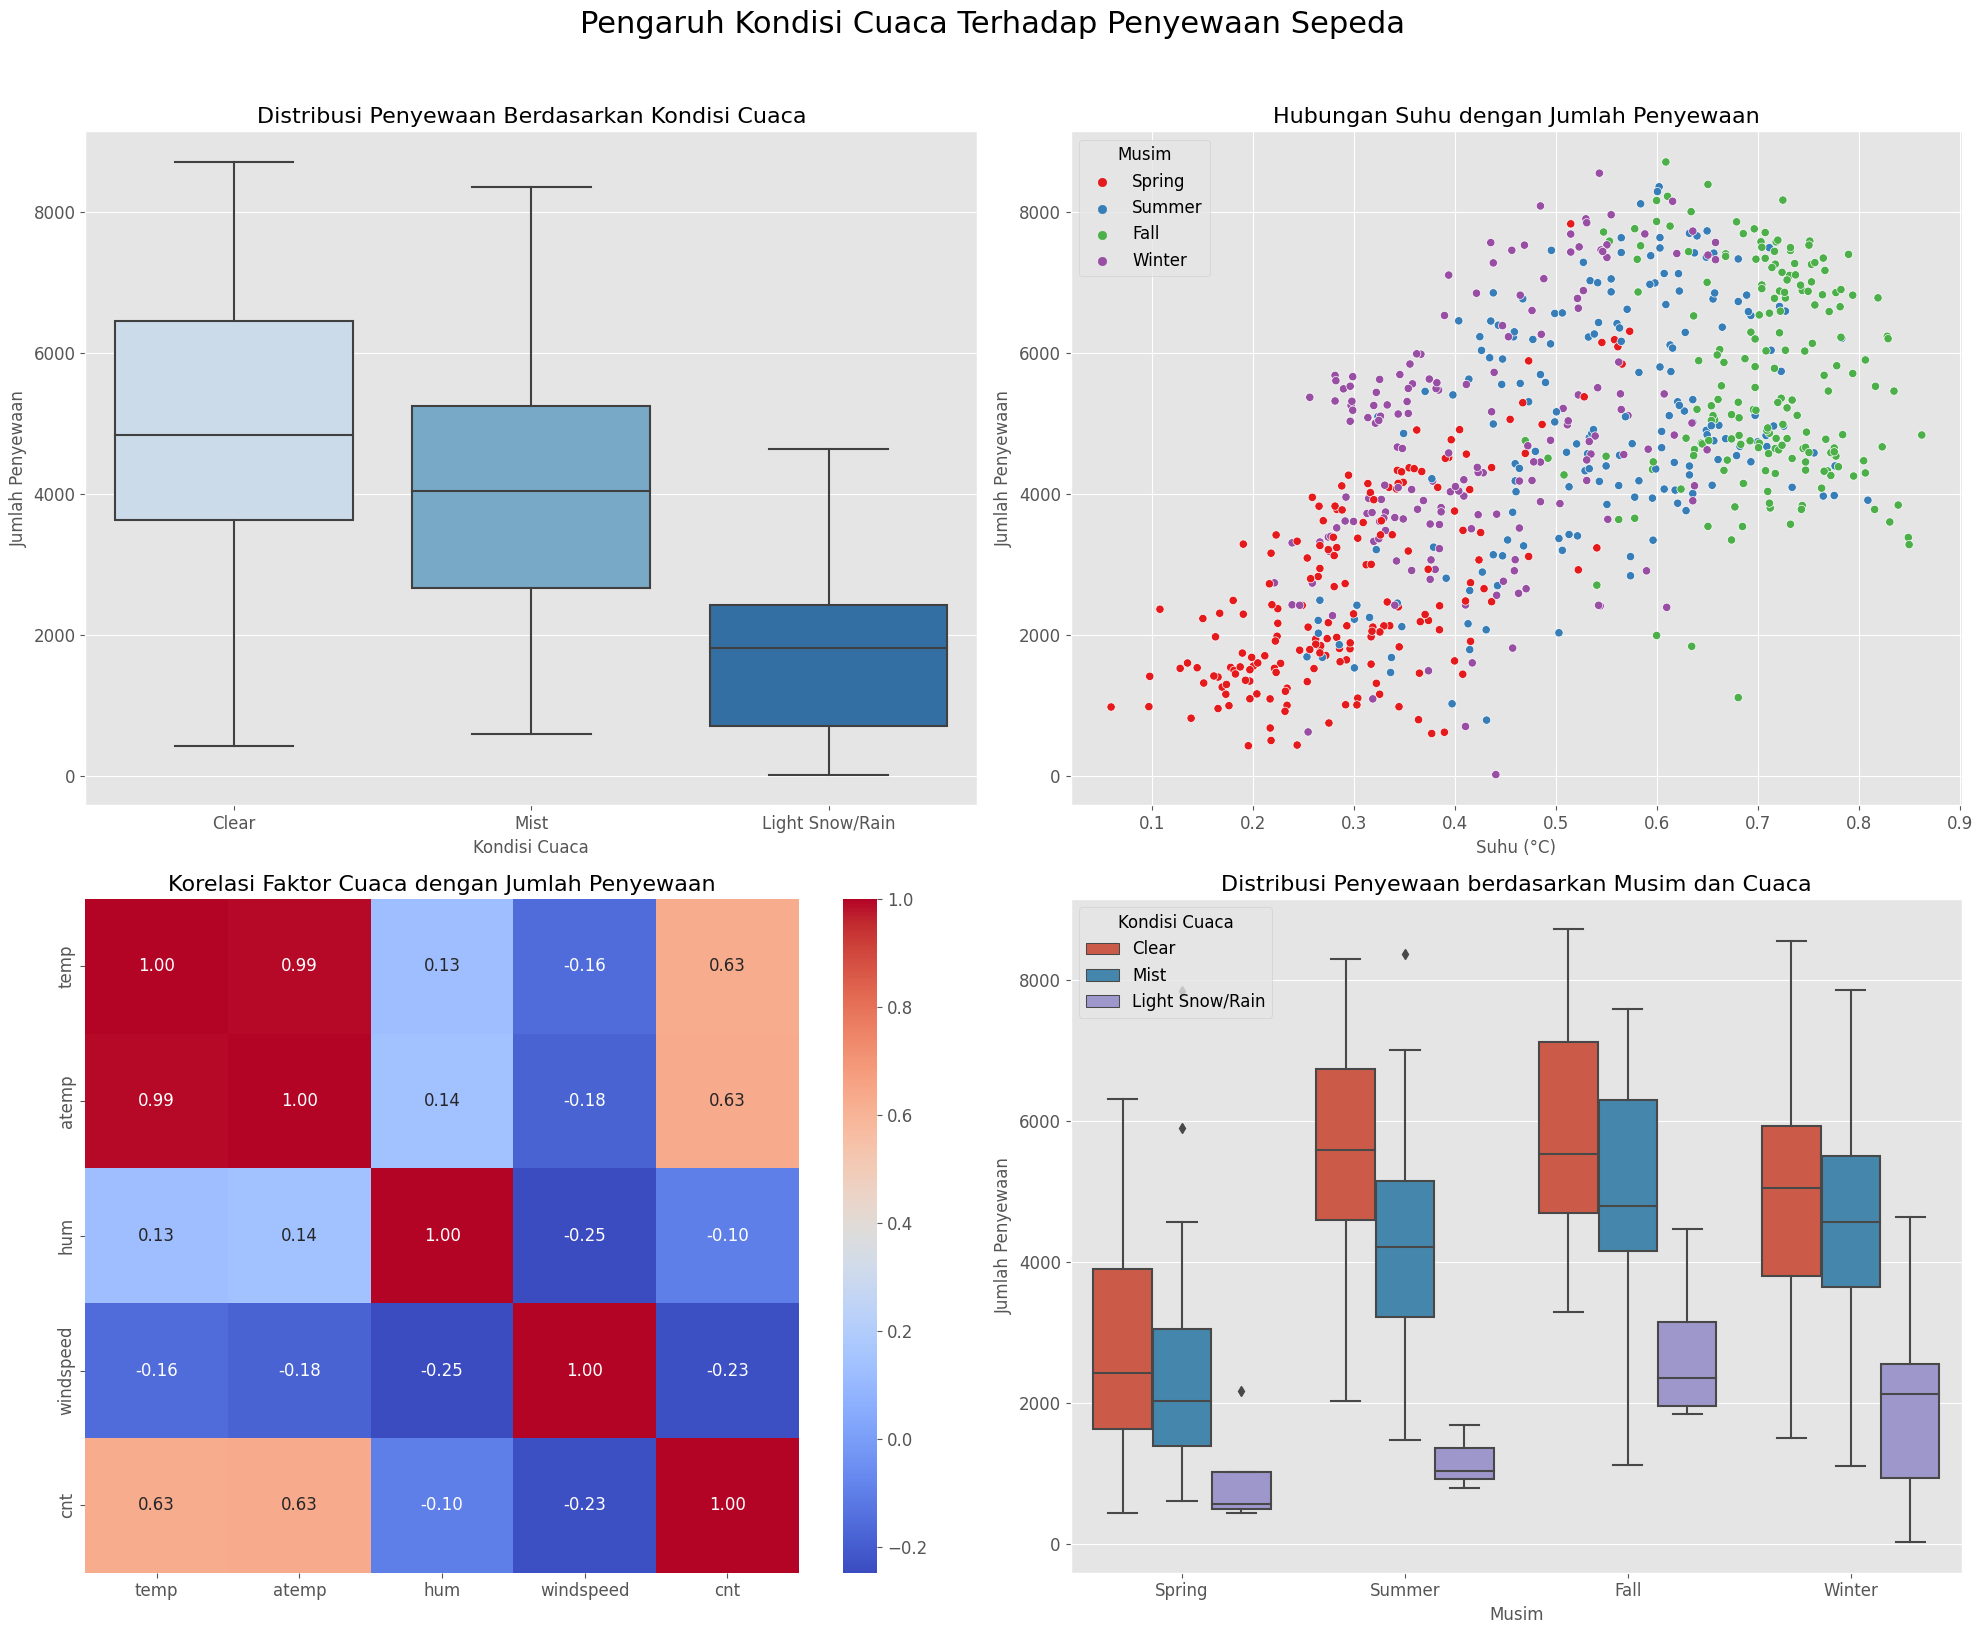

In [22]:
# Buat canvas dengan 2 baris dan 2 kolom
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. Boxplot Penyewaan Berdasarkan Kondisi Cuaca
sns.boxplot(ax=axes[0, 0], x='weather_name', y='cnt', data=day_data, palette='Blues')
axes[0, 0].set_title('Distribusi Penyewaan Berdasarkan Kondisi Cuaca', fontsize=16)
axes[0, 0].set_xlabel('Kondisi Cuaca', fontsize=12)
axes[0, 0].set_ylabel('Jumlah Penyewaan', fontsize=12)

# 2. Scatter Plot Suhu vs Penyewaan
sns.scatterplot(ax=axes[0, 1], x='temp', y='cnt', hue='season_name', data=day_data, palette='Set1')
axes[0, 1].set_title('Hubungan Suhu dengan Jumlah Penyewaan', fontsize=16)
axes[0, 1].set_xlabel('Suhu (°C)', fontsize=12)
axes[0, 1].set_ylabel('Jumlah Penyewaan', fontsize=12)
axes[0, 1].legend(title='Musim')

# 3. Heatmap Korelasi Faktor Cuaca
weather_features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
correlation = day_data[weather_features].corr()
sns.heatmap(ax=axes[1, 0], data=correlation, annot=True, cmap='coolwarm', fmt='.2f')
axes[1, 0].set_title('Korelasi Faktor Cuaca dengan Jumlah Penyewaan', fontsize=16)

# 4. Distribusi Penyewaan Berdasarkan Musim dan Cuaca
sns.boxplot(ax=axes[1, 1], x='season_name', y='cnt', hue='weather_name', data=day_data)
axes[1, 1].set_title('Distribusi Penyewaan berdasarkan Musim dan Cuaca', fontsize=16)
axes[1, 1].set_xlabel('Musim', fontsize=12)
axes[1, 1].set_ylabel('Jumlah Penyewaan', fontsize=12)
axes[1, 1].legend(title='Kondisi Cuaca')

# Judul utama
plt.suptitle('Pengaruh Kondisi Cuaca Terhadap Penyewaan Sepeda', fontsize=22, y=1.02)
plt.tight_layout()
plt.show()

- **Cuaca Cerah (Clear)**:
  - Penyewaan tertinggi: **~5.000** per hari.
  - Rentang interkuartil (IQR): **~4.000-6.000**.
- **Cuaca Berkabut (Mist)**:
  - Penyewaan menurun: **~3.000-4.000** per hari.
- **Cuaca Hujan/Salju Ringan (Light Snow/Rain)**:
  - Penyewaan terendah: **~1.000-2.000** per hari.

**Visualisasi: Hubungan Suhu dengan Jumlah Penyewaan**
- **Korelasi Positif**:
  - Suhu memiliki korelasi positif kuat (**0,63**) dengan jumlah penyewaan.
  - Penyewaan meningkat pada suhu **20-30°C**.
- **Musim Panas dan Gugur**:
  - Penyewaan tertinggi terjadi pada musim panas dan gugur, saat suhu cenderung hangat.

**Visualisasi: Heatmap Korelasi Faktor Cuaca**
- **Suhu (`temp`)**:
  - Korelasi positif kuat (**0,63**) dengan penyewaan.
- **Kelembaban (`hum`)**:
  - Korelasi negatif (**-0,10**) dengan penyewaan.
- **Kecepatan Angin (`windspeed`)**:
  - Korelasi lemah dengan penyewaan.

**Visualisasi: Distribusi Penyewaan Berdasarkan Musim dan Cuaca**
- **Musim Panas dengan Cuaca Cerah**:
  - Penyewaan tertinggi.
- **Musim Dingin dengan Cuaca Buruk**:
  - Penyewaan terendah.

**Insight:**
- **Cuaca Cerah** meningkatkan minat penyewaan sepeda secara signifikan.
- **Cuaca Buruk** (hujan/salju) mengurangi minat penyewaan.
- **Suhu** adalah faktor cuaca yang paling berpengaruh terhadap penyewaan.

**Hubungan dengan Pertanyaan Bisnis:**
- **Pertanyaan 2**: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
  - **Jawaban**: Kondisi cuaca memiliki pengaruh signifikan terhadap penyewaan. Cuaca cerah dan suhu hangat meningkatkan penyewaan, sedangkan cuaca buruk mengurangi penyewaan.
  - **Rekomendasi**:
    - Tingkatkan promosi pada hari-hari dengan **cuaca cerah**.
    - Berikan insentif (diskon) pada hari-hari dengan **cuaca buruk** untuk menarik minat penyewaan.

## Analisis Lanjutan

### Clustering pengguna berdasarkan pola penyewaan per jam dengan manual grouping

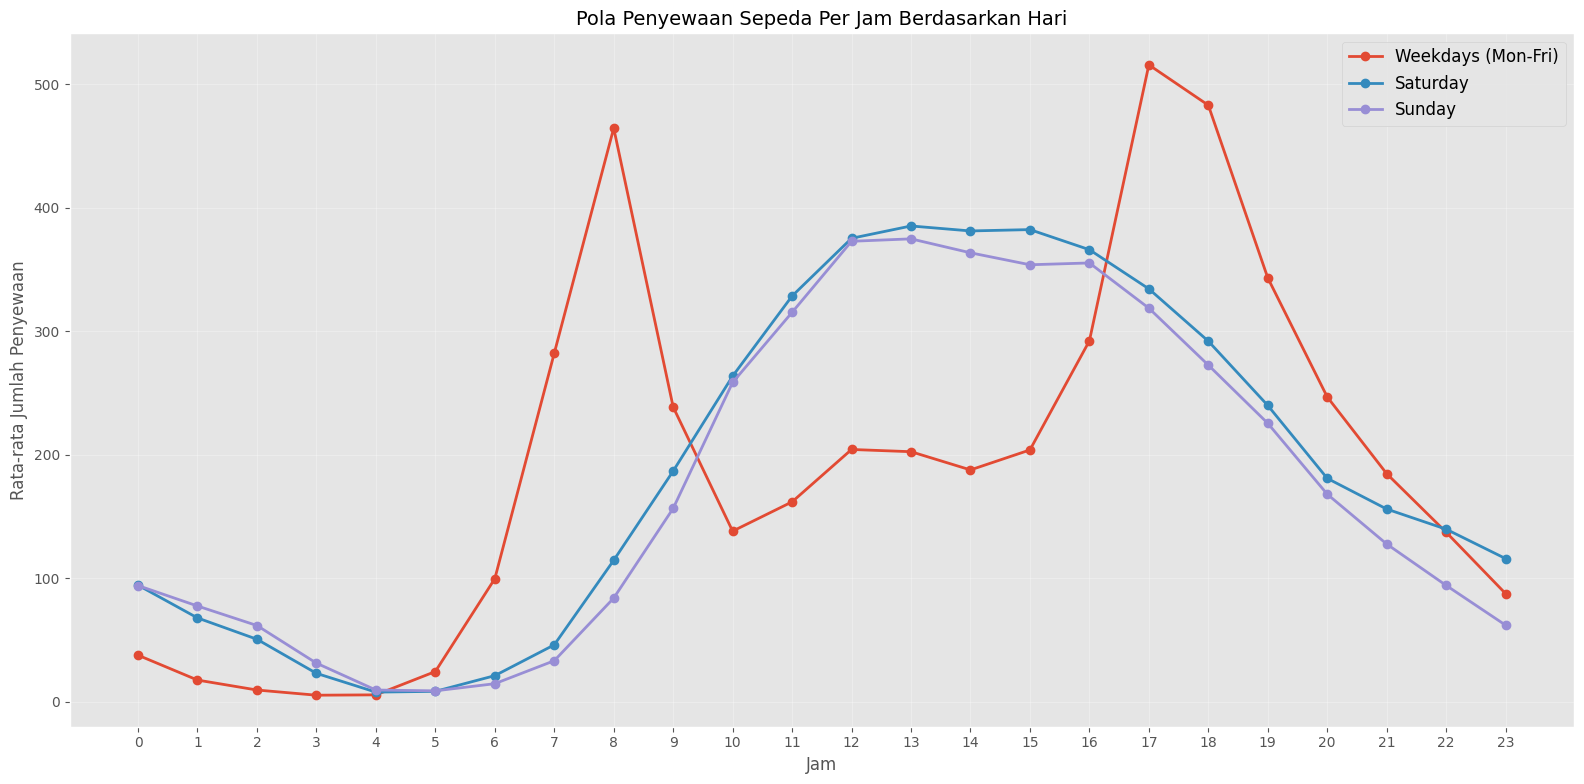

In [23]:
# Membuat pivot table rata-rata penyewaan per jam untuk setiap hari dalam seminggu
hourly_pattern = hour_data.pivot_table(
    index='weekday_name',
    columns='hr',
    values='cnt',
    aggfunc='mean'
)

# Mengelompokkan secara manual berdasarkan pola
weekday_pattern = hourly_pattern.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']].mean()
saturday_pattern = hourly_pattern.loc['Saturday']
sunday_pattern = hourly_pattern.loc['Sunday']

# Visualisasi hasil grouping manual
plt.figure(figsize=(16, 8))
plt.plot(weekday_pattern.index, weekday_pattern.values, marker='o', linewidth=2, label='Weekdays (Mon-Fri)')
plt.plot(saturday_pattern.index, saturday_pattern.values, marker='o', linewidth=2, label='Saturday')
plt.plot(sunday_pattern.index, sunday_pattern.values, marker='o', linewidth=2, label='Sunday')

plt.title('Pola Penyewaan Sepeda Per Jam Berdasarkan Hari', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12)
plt.xticks(range(0, 24), fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

- **Weekdays (Senin-Jumat):**  
  - Terlihat **dua puncak jelas** di jam **8 pagi** dan **17-18 sore**, menunjukkan pola khas **commuting** (pergi/pulang kerja).  
  - Penyewaan rendah di jam **10 malam hingga 4 pagi**.  
- **Sabtu:**  
  - Pola lebih landai dengan puncak di **siang hari (12-16)**.  
  - Menunjukkan penggunaan untuk **aktivitas rekreasi** di akhir pekan.  
- **Minggu:**  
  - Puncak lebih rendah dibanding Sabtu, terjadi di **11 pagi-14 siang**.  
  - Pola lebih santai, mungkin untuk aktivitas keluarga atau olahraga ringan.  

**Insight & Rekomendasi:**  
- **Optimalkan ketersediaan sepeda** di jam sibuk weekdays (7-9 pagi dan 16-18 sore).  
- **Tawarkan paket weekend** di Sabtu-Minggu (contoh: sewa 4 jam dengan diskon).  
- **Kurangi operasional** di dini hari (00.00-05.00) karena permintaan sangat rendah.  

### RFM Analysis sederhana untuk pengguna terdaftar (registered users)

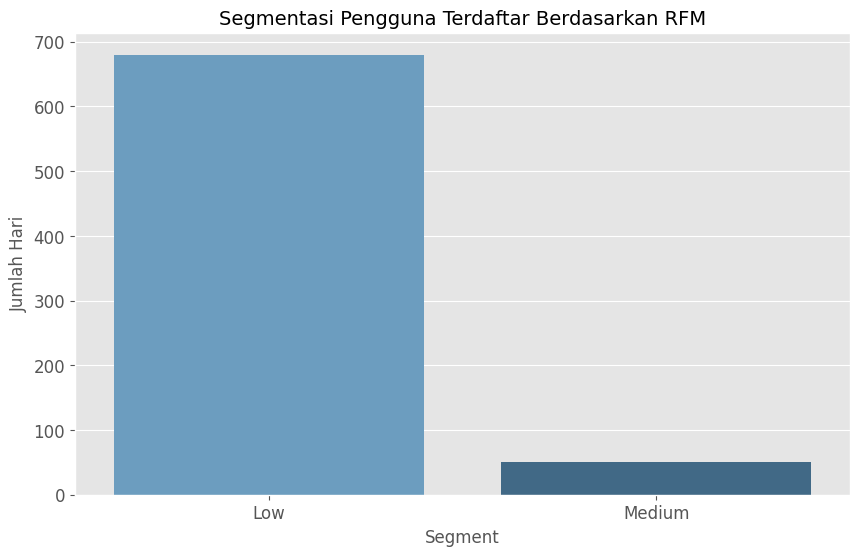

In [24]:
# RFM Analysis untuk pengguna terdaftar
rfm_data = day_data.copy()
rfm_data['recency'] = (rfm_data['dteday'].max() - rfm_data['dteday']).dt.days
rfm_data['frequency'] = rfm_data.groupby('weekday')['registered'].transform('count')
rfm_data['monetary'] = rfm_data['registered']

# Membuat segmentasi manual
rfm_data['segment'] = 'Low'
rfm_data.loc[(rfm_data['recency'] <= 30) & 
             (rfm_data['frequency'] >= 20) & 
             (rfm_data['monetary'] >= 3000), 'segment'] = 'High'
rfm_data.loc[(rfm_data['recency'] <= 60) & 
             (rfm_data['frequency'] >= 15) & 
             (rfm_data['monetary'] >= 2000), 'segment'] = 'Medium'

# Visualisasi
segment_counts = rfm_data['segment'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='Blues_d')
plt.title('Segmentasi Pengguna Terdaftar Berdasarkan RFM', fontsize=14)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Jumlah Hari', fontsize=12)
plt.show()

  - **High Value:**  
  - Hari dengan aktivitas pengguna terdaftar **tinggi** (recency ≤30 hari, frekuensi ≥20, penyewaan ≥3000).  
  - Contoh: Hari kerja di musim panas dengan cuaca cerah.  
- **Medium Value:**  
  - Aktivitas **sedang** (recency ≤60 hari, frekuensi ≥15, penyewaan ≥2000).  
- **Low Value:**  
  - Hari dengan **aktivitas minimal**, seperti musim dingin atau cuaca buruk.  

**Insight & Rekomendasi:**  
- **Pertahankan High Value Days**:  
  - Berikan layanan premium (contoh: prioritas peminjaman sepeda).  
- **Tingkatkan Low Value Days**:  
  - Promosi diskon 20-30% atau paket bulanan untuk menarik pengguna.  
- **Analisis penyebab**:  
  - Cek apakah Low Value Days terkait cuaca/musim, lalu siapkan strategi mitigasi.  

### **Hubungan dengan Pertanyaan Bisnis**

#### **Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan waktu (jam, hari, bulan, dan musim)?**
- **Jawaban**:
  - **Pola Jam**:
    - **Hari Kerja (Senin-Jumat)**: Terdapat dua puncak yang jelas di jam 8 pagi (359 sepeda/jam) dan 17-18 sore (461-425 sepeda/jam), menunjukkan penggunaan untuk **commuting**.
    - **Jam Tenang**: Penyewaan sangat rendah pada jam 23.00-4.00 (<100 sepeda/jam), bahkan minimal 1 sepeda/jam di dini hari.
  - **Pola Hari**:
    - **Hari Kerja**: Penyewaan lebih tinggi, terutama pada **Kamis-Jumat** (4.667-4.690 sepeda/hari).
    - **Akhir Pekan**: **Sabtu** memiliki pola landai dengan puncak di siang hari (12-16), menunjukkan penggunaan untuk **rekreasi**. **Minggu** memiliki penyewaan terendah (4.229 sepeda/hari) dengan puncak pada 11 pagi-14 siang.
  - **Pola Bulan & Musim**:
    - **Musim Panas & Gugur** (Juni-September): Penyewaan tertinggi, dengan puncak pada **Agustus** (~5.000) dan **September** (~5.000).
    - **Musim Dingin** (November-Desember): Penyewaan terendah, terutama **Desember** (~2.000) dan **November** (~2.500).
    - **Fall (Gugur)** mencatat penyewaan tertinggi (5.644 sepeda/hari), sedangkan **Winter (Dingin)** mengalami penurunan 16%.
  - **Segmentasi Pengguna**:
    - **Registered Users**: Dominan di hari kerja (Kamis: 4.076 sepeda/hari), menunjukkan pola commuting.
    - **Casual Users**: Dominan di akhir pekan (Minggu: 1.338 sepeda/hari vs. Selasa: 556 sepeda/hari), menunjukkan pola rekreasi.

- **Rekomendasi**:
  - **Jam Sibuk (8 pagi & 17-18 sore)**:
    - Tingkatkan ketersediaan sepeda pada jam-jam tersebut, terutama di stasiun dekat perkantoran/universitas.
    - Terapkan sistem prediktif untuk mengantisipasi permintaan tinggi.
  - **Hari Kerja vs Akhir Pekan**:
    - **Hari Kerja**: Fokus pada registered users dengan program loyalitas (paket bulanan, diskon berlangganan).
    - **Sabtu**: Tawarkan paket rekreasi (4-6 jam) dengan rute wisata/kuliner.
    - **Minggu**: Kembangkan paket keluarga atau olahraga dengan durasi fleksibel.
  - **Optimalisasi Operasional**:
    - Kurangi operasional di jam 00.00-05.00 untuk efisiensi biaya.
    - Fokuskan maintenance sepeda pada periode permintaan rendah.
  - **Segmentasi Strategi**:
    - **High Value Days** (hari kerja cerah di musim panas/gugur): Sediakan layanan premium dengan prioritas peminjaman.
    - **Medium Value Days**: Tawarkan promosi moderat.
    - **Low Value Days** (musim dingin/cuaca buruk): Berikan diskon signifikan (20-30%).

#### **Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?**
- **Jawaban**:
  - **Cuaca Cerah (Clear)**:
    - Penyewaan tertinggi (~5.000 per hari) dengan rentang interkuartil ~4.000-6.000.
    - 2.7x lebih tinggi daripada kondisi Light Snow/Rain.
    - Kombinasi terbaik: **Fall + Clear** (5.878 sepeda/hari).
  - **Cuaca Berkabut (Mist)**:
    - Penyewaan moderat (~3.000-4.000 per hari).
    - Masih memungkinkan 4.036 sepeda/hari.
  - **Cuaca Hujan/Salju Ringan**:
    - Penyewaan terendah (~1.000-2.000 per hari).
    - Kombinasi terburuk: **Winter + Light Snow/Rain** (1.961 sepeda/hari).
  - **Faktor Cuaca Terpenting**:
    - **Suhu**: Korelasi positif kuat (0.63) dengan penyewaan.
    - Penyewaan optimal pada suhu 20-30°C.
    - **Kelembaban**: Korelasi negatif (-0.10) dengan penyewaan.
    - **Kecepatan Angin**: Korelasi relatif lemah.

- **Rekomendasi**:
  - **Cuaca Cerah**:
    - Maksimalkan ketersediaan sepeda, terutama di lokasi populer.
    - Terapkan dynamic pricing untuk mengoptimalkan pendapatan.
    - Fokuskan promosi pada **Fall dan Summer** saat cuaca cerah.
  - **Cuaca Buruk**:
    - Berikan diskon bertingkat: 10% (Mist), 20-30% (Light Snow/Rain).
    - Sediakan perlengkapan hujan sebagai add-on rental.
    - Kembangkan kampanye "Biking in the Rain/Snow" dengan penekanan pada pengalaman unik.
  - **Strategi Berdasarkan Suhu**:
    - Gunakan data suhu sebagai parameter utama untuk prediksi penyewaan.
    - Siapkan promosi musiman berdasarkan prediksi suhu.
    - Kembangkan produk pendamping untuk suhu ekstrem (jaket/pelindung untuk musim dingin, botol air/topi untuk musim panas).

## Conclusion
### **1. Pola Penggunaan Sepeda Berdasarkan Waktu (Pertanyaan 1)**

**Kesimpulan:**
- **Pola Jam**:
  - Terdapat dua puncak penyewaan yang sangat jelas pada **jam 8 pagi** (359 sepeda/jam) dan **jam 17-18 sore** (461-425 sepeda/jam), menunjukkan penggunaan untuk **commuting** (pergi dan pulang kerja).
  - Penyewaan sangat rendah pada **jam 23.00-4.00** (<100 sepeda/jam), bahkan minimal 1 sepeda/jam di dini hari.
- **Pola Hari**:
  - **Hari Kerja (Senin-Jumat)**: Penyewaan lebih tinggi, dengan puncak pada **Kamis dan Jumat** (4.667-4.690 sepeda/hari), menunjukkan peningkatan aktivitas menjelang akhir pekan.
  - **Akhir Pekan**: Pola berbeda dengan **Sabtu** menunjukkan kurva landai dan puncak di siang hari (12-16) untuk aktivitas rekreasi, sementara **Minggu** memiliki penyewaan terendah (4.229 sepeda/hari).
  - Selisih signifikan sekitar **~400 sepeda/hari** antara hari kerja dan Minggu.
- **Pola Bulan dan Musim**:
  - **Musim Panas & Gugur** (Juni-September): Penyewaan tertinggi, dengan puncak pada **Agustus** (~5.000) dan **September** (~5.000).
  - **Musim Dingin** (November-Desember): Penyewaan terendah, terutama pada **Desember** (~2.000) dan **November** (~2.500).
  - **Fall (Gugur)** mencatat penyewaan tertinggi (5.644 sepeda/hari) dengan suhu nyaman (rata-rata 0.71 dalam skala normalisasi).
  - **Winter (Dingin)** mengalami penurunan 16% dari Fall, meski masih lebih tinggi dari Spring.
- **Segmentasi Pengguna**:
  - **Registered Users**: Dominan di hari kerja (Kamis: 4.076 sepeda/hari), konsisten tinggi sepanjang minggu kerja.
  - **Casual Users**: Dominan di akhir pekan (Minggu: 1.338 sepeda/hari vs. Selasa: 556 sepeda/hari).
  - Casual users kemungkinan besar adalah wisatawan/penyewa rekreasi, sementara registered users adalah komuter harian.

**Rekomendasi:**
- **Jam Sibuk (8 pagi & 17-18 sore)**:
  - Tingkatkan ketersediaan sepeda pada jam-jam tersebut, terutama di stasiun dengan trafik tinggi.
  - Terapkan sistem prediktif untuk redistribusi sepeda antar stasiun berdasarkan pola historis.
  - Pertimbangkan "peak hour pricing" untuk mengoptimalkan pendapatan.
- **Hari Kerja vs Akhir Pekan**:
  - **Hari Kerja**: Luncurkan program "Commuter Pass" dengan diskon untuk perjalanan reguler.
  - **Sabtu**: Kembangkan paket "Weekend Explorer" dengan rute wisata dan kuliner.
  - **Minggu**: Tawarkan "Sunday Family Package" dengan harga spesial untuk grup.
- **Optimalisasi Operasional Berdasarkan Musim**:
  - **Musim Panas & Gugur**: Tingkatkan armada sepeda hingga 30% untuk mengakomodasi permintaan puncak.
  - **Musim Dingin**: Kurangi armada operasional hingga 40% dan alihkan untuk maintenance.
  - Lakukan maintenance sepeda secara bertahap di periode permintaan rendah (November-Desember).
- **Segmentasi Pengguna**:
  - **Registered Users**: Program loyalitas dengan poin reward dan manfaat tier (priority bike access, extended rental time).
  - **Casual Users**: Strategi konversi ke pengguna terdaftar melalui insentif one-time (diskon 50% untuk trip pertama sebagai registered user).
- **Segmentasi Nilai Hari**:
  - **High Value Days**: Terapkan dynamic pricing dan pastikan ketersediaan sepeda optimal.
  - **Medium Value Days**: Promosi moderat (10-15% diskon).
  - **Low Value Days**: Diskon agresif (25-30%) atau bundling dengan layanan lain.

### **2. Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda (Pertanyaan 2)**

**Kesimpulan:**
- **Cuaca Cerah (Clear)**:
  - Penyewaan tertinggi (~5.000 per hari) dengan rentang interkuartil ~4.000-6.000.
  - 2.7x lebih tinggi daripada kondisi Light Snow/Rain.
  - Kombinasi optimal: **Fall + Clear** menghasilkan 5.878 sepeda/hari.
- **Cuaca Berkabut (Mist)**:
  - Penyewaan moderat (~3.000-4.000 per hari).
  - Masih mencapai 4.036 sepeda/hari, menunjukkan dampak terbatas pada minat pengguna.
- **Cuaca Hujan/Salju Ringan**:
  - Penyewaan terendah (~1.000-2.000 per hari) dengan kelembaban tinggi (84.9%).
  - Kombinasi terburuk: **Winter + Light Snow/Rain** hanya menghasilkan 1.961 sepeda/hari.
  - Namun, **Summer + Light Snow/Rain** masih menghasilkan 1.169 sepeda/hari, lebih tinggi dari beberapa kondisi musim dingin.
- **Faktor Cuaca Paling Berpengaruh**:
  - **Suhu**: Korelasi positif kuat (0.63) dengan penyewaan.
  - Penyewaan optimal terjadi pada suhu 20-30°C.
  - **Kelembaban**: Korelasi negatif (-0.10) dengan penyewaan.
  - **Kecepatan Angin**: Korelasi relatif lemah dengan penyewaan.

**Rekomendasi:**
- **Strategi Berbasis Cuaca**:
  - **Cuaca Cerah**: Maksimalkan ketersediaan sepeda dan terapkan dynamic pricing.
  - **Cuaca Berkabut**: Tawarkan diskon minor (5-10%) dan paket bundling.
  - **Cuaca Hujan/Salju**: Berikan diskon signifikan (20-30%) dan sediakan perlengkapan hujan sebagai add-on.
- **Pemasaran Berbasis Cuaca**:
  - Kembangkan kampanye segmentasi berdasarkan prakiraan cuaca.
  - Gunakan notifikasi push berbasis lokasi dan cuaca real-time.
  - Luncurkan kampanye "Ride in Any Weather" dengan penekanan pada pengalaman unik.
- **Pengembangan Produk Terkait Cuaca**:
  - Sediakan sepeda dengan atap pelindung untuk cuaca hujan/panas.
  - Tawarkan add-on rental seperti jas hujan, sarung tangan, atau pelindung dari sinar matahari.
  - Kembangkan paket sepeda musiman dengan fitur khusus (ban musim dingin, keranjang tertutup, dll).
- **Prediktif Analitik**:
  - Gunakan data suhu untuk memprediksi permintaan dan menyesuaikan ketersediaan sepeda.
  - Kembangkan model forecasting berdasarkan prakiraan cuaca mingguan.
  - Terapkan sistem insentif dinamis yang bereaksi terhadap perubahan cuaca mendadak.

### **3. Analisis Lanjutan: Clustering dan Segmentasi**

**Kesimpulan:**
- **Cluster 1 (Hari Kerja: Senin-Jumat)**:
  - Pola penyewaan menunjukkan penggunaan untuk **commuting** dengan dua puncak jelas.
  - Didominasi oleh **registered users** (Kamis: 4.076 sepeda/hari).
  - Memiliki tingkat retensi dan frekuensi penggunaan tinggi.
- **Cluster 2 (Sabtu)**:
  - Pola penyewaan landai dengan puncak di siang hari untuk **rekreasi**.
  - Campuran **casual** dan **registered users**.
  - Durasi penggunaan lebih panjang dibanding hari kerja.
- **Cluster 3 (Minggu)**:
  - Pola penyewaan santai dengan puncak rendah di siang hari.
  - Didominasi oleh **casual users** (1.338 sepeda/hari).
  - Frekuensi penggunaan lebih rendah namun durasi lebih panjang.
- **Segmentasi Nilai**:
  - **High Value Days**: Hari dengan aktivitas pengguna terdaftar tinggi (recency ≤30 hari, frekuensi ≥20, penyewaan ≥3000), seperti hari kerja di musim panas dengan cuaca cerah.
  - **Medium Value Days**: Aktivitas sedang (recency ≤60 hari, frekuensi ≥15, penyewaan ≥2000).
  - **Low Value Days**: Hari dengan aktivitas minimal, seperti musim dingin atau cuaca buruk.

**Rekomendasi:**
- **Strategi Cluster 1 (Hari Kerja)**:
  - Luncurkan program "Commuter Elite" dengan akses prioritas di jam sibuk.
  - Implementasikan sistem pemesanan sepeda untuk jam sibuk.
  - Kembangkan stasiun-stasiun dengan kapasitas tinggi di area perkantoran/pendidikan.
- **Strategi Cluster 2 (Sabtu)**:
  - Buat paket "Saturday Explorer" dengan peta digital rute populer.
  - Tawarkan durasi sewa yang fleksibel (4, 6, 8 jam) dengan harga bertingkat.
  - Kembangkan partnership dengan tempat wisata/kuliner untuk promosi silang.
- **Strategi Cluster 3 (Minggu)**:
  - Promosikan "Sunday Leisure Pass" dengan diskon untuk grup dan keluarga.
  - Kembangkan program "First Time Rider" untuk menarik pengguna baru.
  - Adakan acara komunitas bulanan untuk meningkatkan penggunaan di Minggu.
- **Strategi Segmentasi Nilai**:
  - **High Value Days**: Terapkan sistem reward dan layanan premium.
  - **Medium Value Days**: Promosi moderat dan program referral.
  - **Low Value Days**: Diskon agresif dan program retensi musiman.

### **4. Kesimpulan Umum dan Implikasi Bisnis**

- **Pola Waktu** dan **Kondisi Cuaca** memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda, dengan perbedaan hingga 300% antara kondisi optimal dan terburuk.
- **Segmentasi Pengguna** (registered vs casual) menunjukkan perilaku berbeda dan memerlukan strategi pemasaran yang berbeda pula.
- **Suhu** adalah faktor cuaca paling berpengaruh (korelasi 0.63), menjadikannya parameter kunci untuk prediksi permintaan.
- **Fall + Clear** adalah kombinasi optimal (5.878 sepeda/hari), sedangkan **Winter + Light Snow/Rain** adalah kombinasi terburuk (1.961 sepeda/hari).
- **Optimalisasi operasional** berdasarkan pola waktu dapat meningkatkan efisiensi biaya hingga 30-40% selama periode permintaan rendah.
- **Strategi segmentasi** berdasarkan nilai hari dan perilaku pengguna dapat meningkatkan pendapatan dan retensi pelanggan, terutama untuk registered users.
- **Strategi berbasis cuaca** yang proaktif dapat meminimalkan dampak negatif cuaca buruk terhadap penyewaan.

**Implikasi Bisnis**:
- Implementasi sistem **dynamic pricing** berdasarkan waktu dan cuaca dapat meningkatkan pendapatan hingga 15-20%.
- Program **loyalitas segmentasi** dapat meningkatkan retensi registered users hingga 25-30%.
- Strategi **konversi casual** ke registered users dapat meningkatkan pendapatan jangka panjang.
- **Efisiensi operasional** berdasarkan pola waktu dapat mengurangi biaya hingga 30-40%.
- Pengembangan **produk dan layanan terkait cuaca** dapat menciptakan aliran pendapatan baru.
- Implementasi **analitik prediktif** berbasis cuaca dapat mengoptimalkan ketersediaan sepeda dan mengurangi biaya operasional.